In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import scikitplot as skplt
from typing import List
from itertools import combinations
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [51]:
df = pd.read_csv("insurance_labeled.csv", sep=",")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,28,0,yes,southwest,>=10000
1,18,male,34,1,no,southeast,<10000
2,28,male,33,3,no,southeast,<10000
3,33,male,23,0,no,northwest,>=10000
4,32,male,29,0,no,northwest,<10000
...,...,...,...,...,...,...,...
1333,50,male,31,3,no,northwest,>=10000
1334,18,female,32,0,no,northeast,<10000
1335,18,female,37,0,no,southeast,<10000
1336,21,female,26,0,no,southwest,<10000


In [52]:
"""def changeLabels(charge):
    if charge >= 10000:
        return ">=10000"
    return "<10000"
def roundBMI(bmi):
    return round(bmi)
df["bmi"] = df["bmi"].apply(roundBMI)
df["charges"] = df["charges"].astype(float).apply(changeLabels)
df.to_csv("insurance_labeled.csv",index=False)"""

'def changeLabels(charge):\n    if charge >= 10000:\n        return ">=10000"\n    return "<10000"\ndef roundBMI(bmi):\n    return round(bmi)\ndf["bmi"] = df["bmi"].apply(roundBMI)\ndf["charges"] = df["charges"].astype(float).apply(changeLabels)\ndf.to_csv("insurance_labeled.csv",index=False)'

In [53]:
df.charges.value_counts()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,28,0,yes,southwest,>=10000
1,18,male,34,1,no,southeast,<10000
2,28,male,33,3,no,southeast,<10000
3,33,male,23,0,no,northwest,>=10000
4,32,male,29,0,no,northwest,<10000
...,...,...,...,...,...,...,...
1333,50,male,31,3,no,northwest,>=10000
1334,18,female,32,0,no,northeast,<10000
1335,18,female,37,0,no,southeast,<10000
1336,21,female,26,0,no,southwest,<10000


In [54]:
label_encoder = preprocessing.LabelEncoder()
df["sex"] = label_encoder.fit_transform(df["sex"])
df["smoker"] = label_encoder.fit_transform(df["smoker"])
df["region"] = label_encoder.fit_transform(df["region"])

In [55]:
feature_columns = ["age","sex","bmi","children","smoker","region"]

In [56]:
x = df[feature_columns].values
y = df.charges.values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
model = RandomForestClassifier(100)
#model = XGBClassifier()
#model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [57]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [58]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[218   6]
 [ 18 160]]


In [59]:
cr = metrics.classification_report(y_test, y_pred)
print("Classification Report: ")
print(cr)

Classification Report: 
              precision    recall  f1-score   support

      <10000       0.92      0.97      0.95       224
     >=10000       0.96      0.90      0.93       178

    accuracy                           0.94       402
   macro avg       0.94      0.94      0.94       402
weighted avg       0.94      0.94      0.94       402



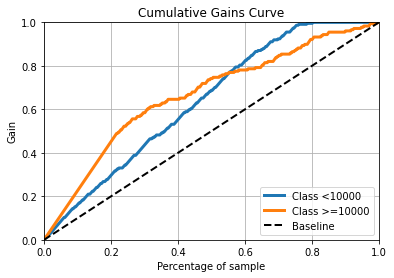

In [49]:
predicted_probas = model.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()